# Projet Final Apprentissage Automatique pour la Science des Données

auteurs : Akram Farihi, Amalya Mourih, Sami Ablaoui, Rania Sellah

Dans ce projet, nous allons implémenter, evaluer et benchmark un système de classification multicalss en ML. Nous allons étudier l'affectation sur la santé de consommation de caféine à partir d'un jeux des données 

## 1. Selection des données et analyse exploiratoire

Nous avons séléctionner ces données pour notre projet  :

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uom190346a/global-coffee-health-dataset")

print("Path to dataset files:", path)

c:\Users\amaly\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\amaly\.cache\kagglehub\datasets\uom190346a\global-coffee-health-dataset\versions\1


In [9]:
import pandas as pd

df = pd.read_csv(f"{path}/synthetic_coffee_health_10000.csv")
df.head()


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [10]:
print(f"\nDimensions: {df.shape}")
print(f"\nTypes de données:\n{df.dtypes}")
print(f"\nValeurs manquantes:\n{df.isnull().sum()}")
print(f"\nStatistiques descriptives:\n{df.describe()}")


Dimensions: (10000, 16)

Types de données:
ID                           int64
Age                          int64
Gender                      object
Country                     object
Coffee_Intake              float64
Caffeine_mg                float64
Sleep_Hours                float64
Sleep_Quality               object
BMI                        float64
Heart_Rate                   int64
Stress_Level                object
Physical_Activity_Hours    float64
Health_Issues               object
Occupation                  object
Smoking                      int64
Alcohol_Consumption          int64
dtype: object

Valeurs manquantes:
ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_


Distribution de Health_Issues:
Health_Issues
None        5941
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64

Proportions:
Health_Issues
None        0.5941
Mild        0.3579
Moderate    0.0463
Severe      0.0017
Name: proportion, dtype: float64


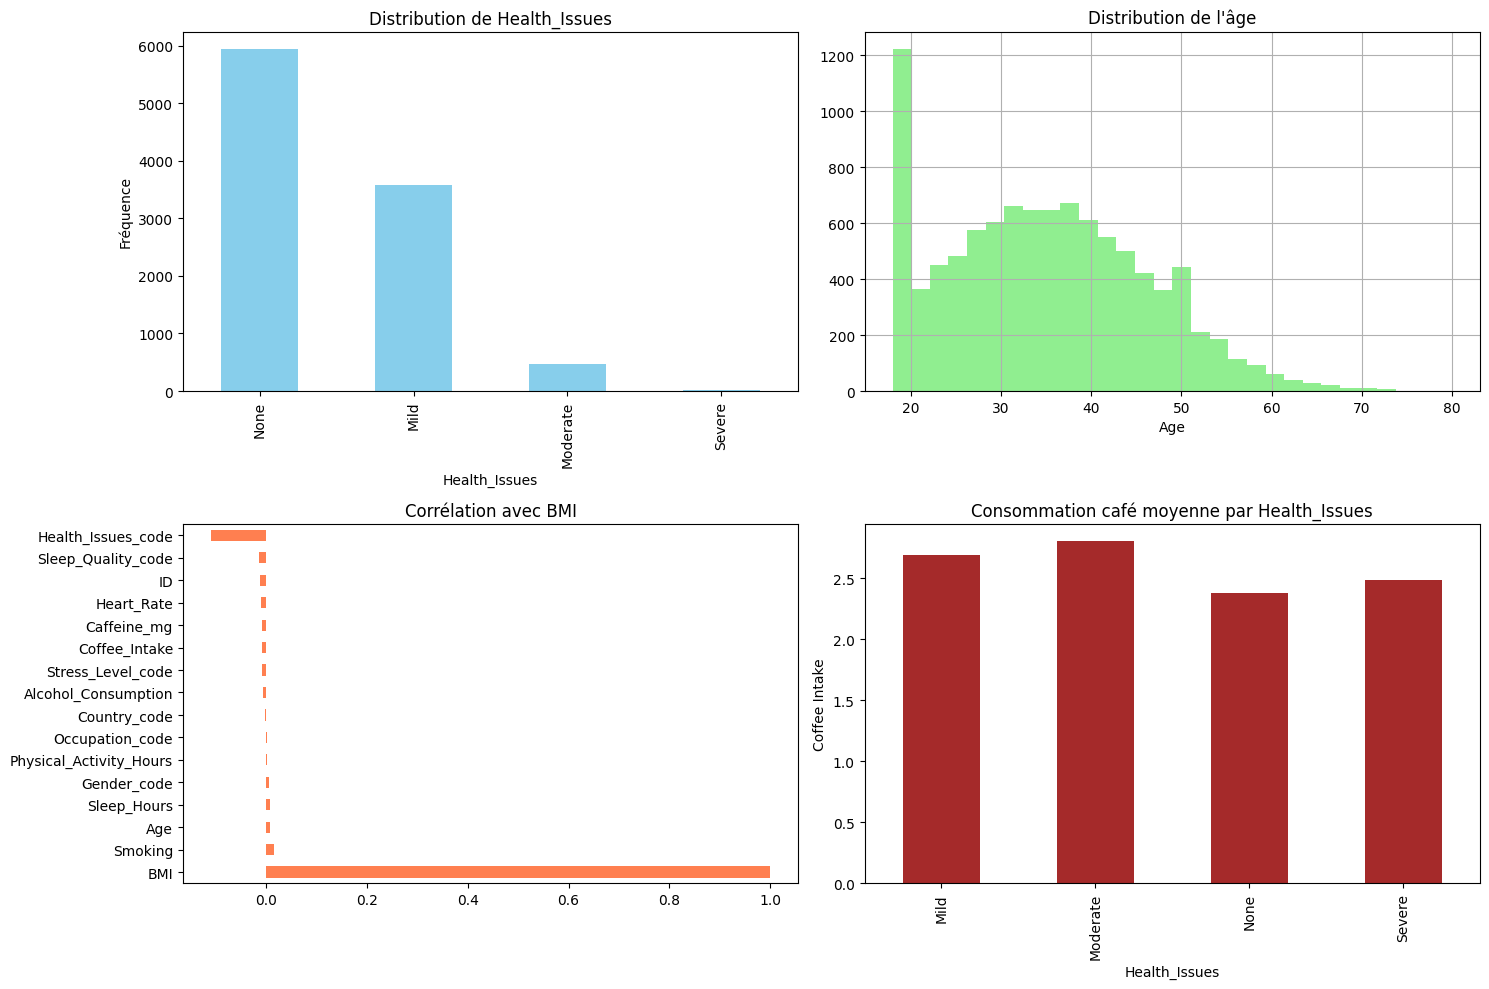


Distribution de Stress_Level:
Stress_Level
Low       6989
Medium    2050
High       961
Name: count, dtype: int64

Proportions:
Stress_Level
Low       0.6989
Medium    0.2050
High      0.0961
Name: proportion, dtype: float64


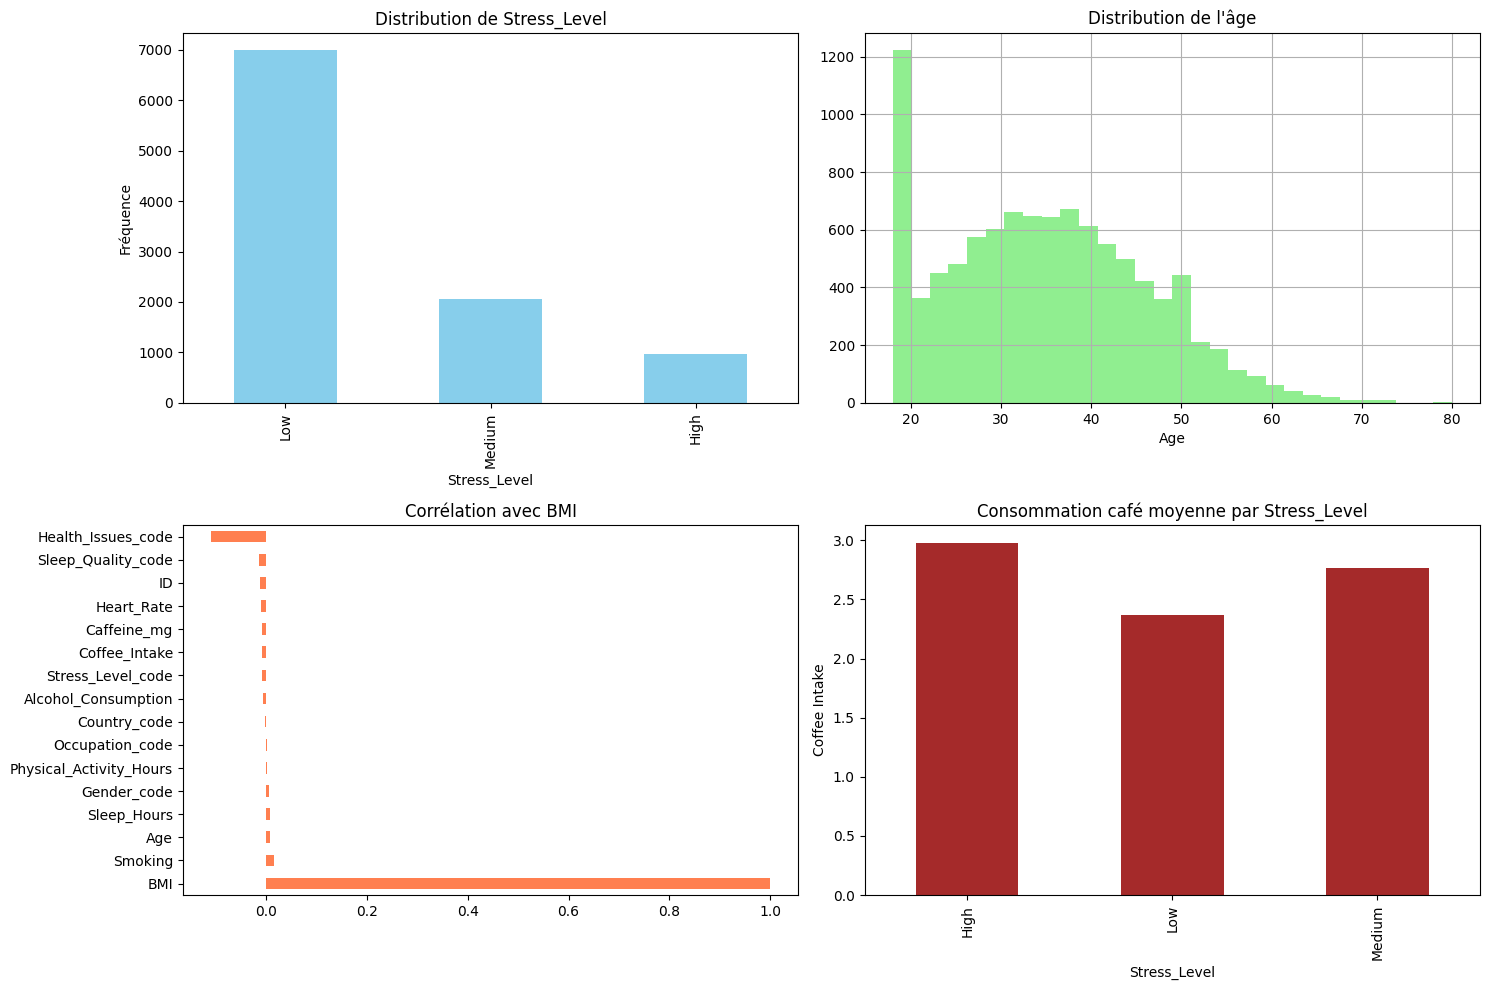


Distribution de Sleep_Hours:
Sleep_Hours
6.7    333
6.9    331
6.6    324
7.1    323
6.5    320
      ... 
9.9      8
3.4      7
3.1      6
3.2      6
9.7      5
Name: count, Length: 71, dtype: int64

Proportions:
Sleep_Hours
6.7    0.0333
6.9    0.0331
6.6    0.0324
7.1    0.0323
6.5    0.0320
        ...  
9.9    0.0008
3.4    0.0007
3.1    0.0006
3.2    0.0006
9.7    0.0005
Name: proportion, Length: 71, dtype: float64


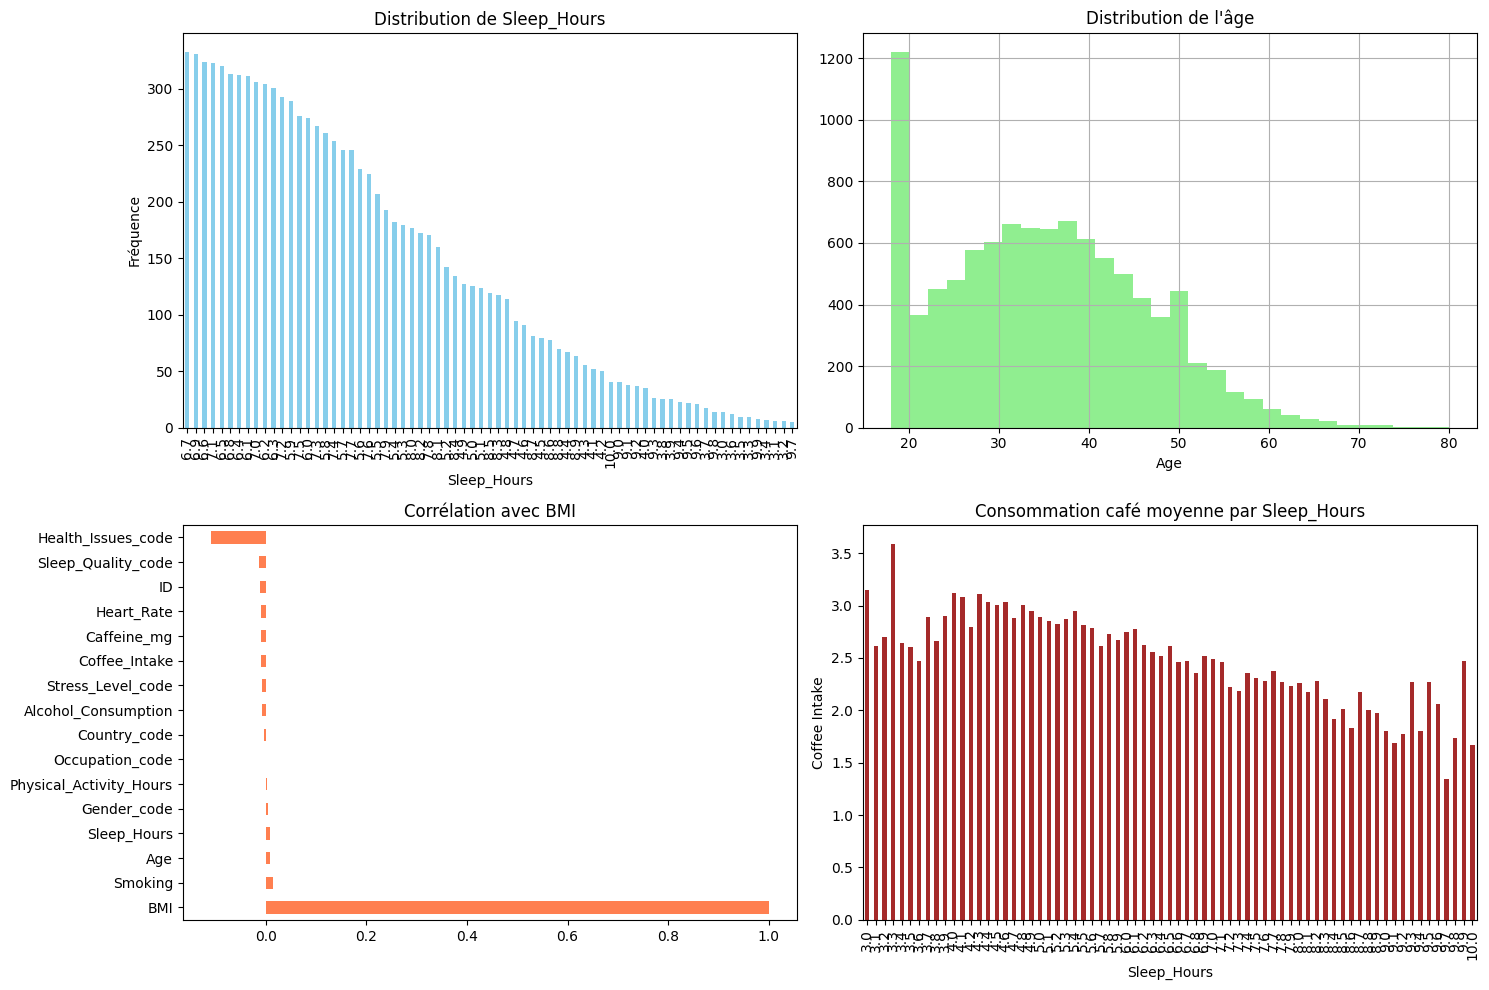


Distribution de Sleep_Quality:
Sleep_Quality
Good         5637
Fair         2050
Excellent    1352
Poor          961
Name: count, dtype: int64

Proportions:
Sleep_Quality
Good         0.5637
Fair         0.2050
Excellent    0.1352
Poor         0.0961
Name: proportion, dtype: float64


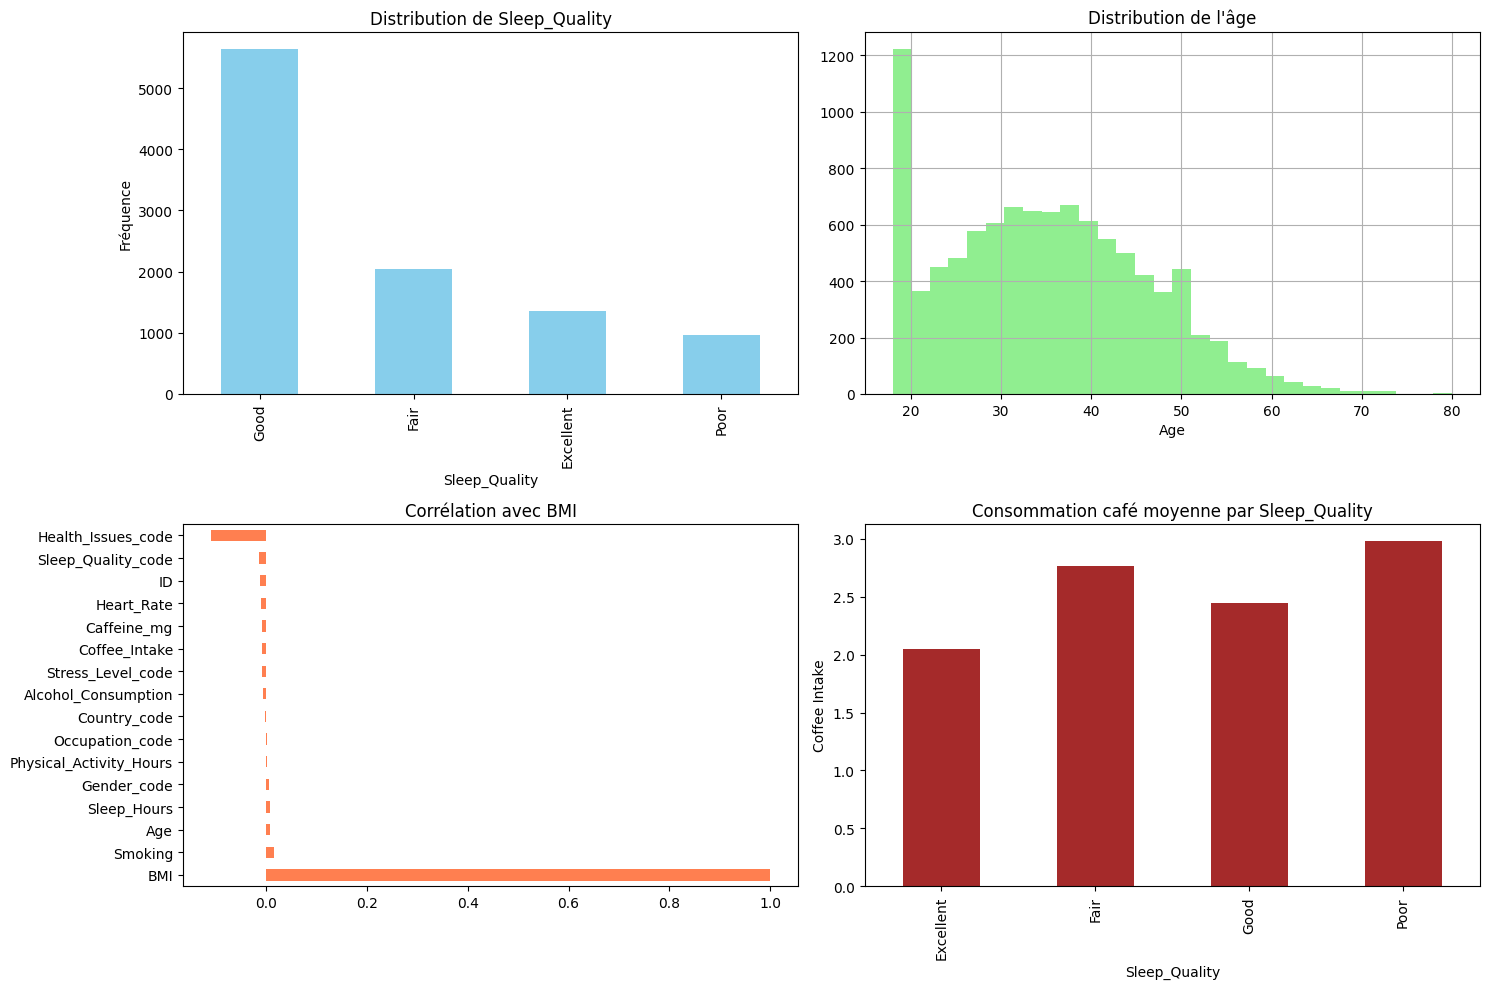

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

issues_sante = ['Health_Issues', 'Stress_Level', 'Sleep_Hours', 'Sleep_Quality'] 

for i in issues_sante:
    TARGET =  i

    print(f"\nDistribution de {TARGET}:")
    print(df[TARGET].value_counts())
    print(f"\nProportions:\n{df[TARGET].value_counts(normalize=True)}")

# Visualisation
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution de la cible
    df[TARGET].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title(f'Distribution de {TARGET}')
    axes[0, 0].set_ylabel('Fréquence')

# Distribution de l'âge
    df['Age'].hist(bins=30, ax=axes[0, 1], color='lightgreen')
    axes[0, 1].set_title('Distribution de l\'âge')
    axes[0, 1].set_xlabel('Age')

# Corrélation avec variables numériques
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols].corr()['BMI'].sort_values(ascending=False).plot(
        kind='barh', ax=axes[1, 0], color='coral')
    axes[1, 0].set_title('Corrélation avec BMI')

# Coffee_Intake vs Target
    df.groupby(TARGET)['Coffee_Intake'].mean().plot(kind='bar', ax=axes[1, 1], color='brown')
    axes[1, 1].set_title(f'Consommation café moyenne par {TARGET}')
    axes[1, 1].set_ylabel('Coffee Intake')

    plt.tight_layout()
    plt.show()

## 2. Nettoyage des données 


In [4]:
null_data = df.isnull().sum()
print(null_data)

ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5941
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64


In [5]:

nan_data = df.isna().sum()
print(nan_data)

ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5941
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64


Nous voyons que les données manquants sont presents dans la colonne "Health Issues" mais nous pensons que c'est un type de données pour dire que la personne n'a pas des issues sur santé donc nous allons remplacé les valeurs manquants par None

In [7]:
health_issues_counts = df['Health_Issues']
print(health_issues_counts.value_counts())
print(health_issues_counts)
df["Health_Issues"] = df["Health_Issues"].fillna("None")

Health_Issues
None        5941
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64
0           None
1           None
2           Mild
3           Mild
4           Mild
          ...   
9995    Moderate
9996        Mild
9997        None
9998        None
9999        None
Name: Health_Issues, Length: 10000, dtype: object


Comme la partie interessante nous pouvons regrouper les valeurs par les caracterestiques des personnes, leurs mauvaises habitudes et l'issue de santé en trois groupe 

In [11]:
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [ ]:
car_personnes = ['Age', 'Gender', 'Country', 'BMI', 'Sleep_Duration', 'Occupation', 'Physical_Activity_Hours']
mauv_habitudes = ['Coffee_Intake', 'Caffeine_mg', 'Smoking', 'Alcohol_Conqumption']


nous allons encoder chaque classe contenant des valeurs categoriales par les chiffres :

In [15]:

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_mappings = {}

for col in cat_cols:
    cat = pd.Categorical(df[col])
    df[f"{col}_code"] = cat.codes.astype(int)
    categorical_mappings[col] = {val: int(i) for i, val in enumerate(cat.categories)}

for col, mapping in categorical_mappings.items():
    print(f"{col}: {mapping}")

# S'assurer que la colonne cible a bien un code (si elle est catégorielle)
if TARGET in df.columns:
    if TARGET in categorical_mappings:
        df[f"{TARGET}_code"] = df[TARGET].map(categorical_mappings[TARGET]).fillna(-1).astype(int)
    else:
        df[f"{TARGET}_code"] = pd.Categorical(df[TARGET].fillna("None")).codes.astype(int)

print(df[[c for c in df.columns if c.endswith('_code')]].head())

Gender: {'Female': 0, 'Male': 1, 'Other': 2}
Country: {'Australia': 0, 'Belgium': 1, 'Brazil': 2, 'Canada': 3, 'China': 4, 'Finland': 5, 'France': 6, 'Germany': 7, 'India': 8, 'Italy': 9, 'Japan': 10, 'Mexico': 11, 'Netherlands': 12, 'Norway': 13, 'South Korea': 14, 'Spain': 15, 'Sweden': 16, 'Switzerland': 17, 'UK': 18, 'USA': 19}
Sleep_Quality: {'Excellent': 0, 'Fair': 1, 'Good': 2, 'Poor': 3}
Stress_Level: {'High': 0, 'Low': 1, 'Medium': 2}
Health_Issues: {'Mild': 0, 'Moderate': 1, 'None': 2, 'Severe': 3}
Occupation: {'Healthcare': 0, 'Office': 1, 'Other': 2, 'Service': 3, 'Student': 4}
   Gender_code  Country_code  Sleep_Quality_code  Stress_Level_code  \
0            1             7                   2                  1   
1            1             7                   2                  1   
2            1             2                   1                  2   
3            1             7                   2                  1   
4            0            15                   1

Nous verifions si les données sont desequilibres

In [21]:
print(df['Health_Issues'].value_counts())
print(df['Health_Issues'].value_counts(normalize=True))
print(df['Stress_Level'].value_counts())
print(df['Stress_Level'].value_counts(normalize=True))


Health_Issues
None        5941
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64
Health_Issues
None        0.5941
Mild        0.3579
Moderate    0.0463
Severe      0.0017
Name: proportion, dtype: float64
Stress_Level
Low       6989
Medium    2050
High       961
Name: count, dtype: int64
Stress_Level
Low       0.6989
Medium    0.2050
High      0.0961
Name: proportion, dtype: float64


In [23]:
print(df['Sleep_Quality'].value_counts())
print(df['Sleep_Quality'].value_counts(normalize=True))


Sleep_Quality
Good         5637
Fair         2050
Excellent    1352
Poor          961
Name: count, dtype: int64
Sleep_Quality
Good         0.5637
Fair         0.2050
Excellent    0.1352
Poor         0.0961
Name: proportion, dtype: float64


<Axes: xlabel='Sleep_Quality', ylabel='count'>

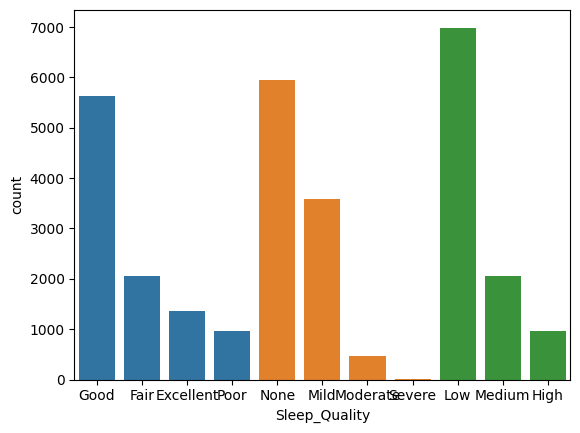

In [24]:
import seaborn as sns
sns.countplot(data=df, x='Sleep_Quality')
sns.countplot(data=df, x='Health_Issues')
sns.countplot(data=df, x='Stress_Level')

Normalement a partir des chiffres et visualizations nous pouvons conclure que les données cibles ne sont pas desequilibrés nous verfier pour les autres valeurs plus tard